# Exploratory data analysis (EDA)
Exploratory Data Analysis or EDA is used to get insights from the data. <br>
Time series  models can be univariate or multivariate. We are going to conduct EDA on a multivariate time series model since the data has multiple dependent variables (the output depends on more than one series)

## Load Data

In [1]:
# importing libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from datetime import datetime, time
from scipy import stats
import itertools
import plotly.express as px
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")



### Importing scripts

In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [3]:
for dirname, _, filenames in os.walk('../scripts/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../scripts/data_info.py
../scripts/data_Preprocess.py
../scripts/Reg_script.py
../scripts/VisualisationPlots.py
../scripts/__pycache__\data_info.cpython-310.pyc
../scripts/__pycache__\VisualisationPlots.cpython-310.pyc


### Custom library

In [4]:
from VisualisationPlots import VisualiseDf
from data_info import  DataInfo
#sns.set()

In [5]:
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/sample_submission.csv
../data/store.csv
../data/test.csv
../data/train.csv


In [6]:
# load all dataframes into notebook

sample_df = pd.read_csv("../data/sample_submission.csv")
store_df = pd.read_csv("../data/store.csv")
test_df = pd.read_csv("../data/test.csv")
train_df = pd.read_csv("../data/train.csv")


In [7]:
sample_df.head(2)

,Id,Sales
0,1,0
1,2,0


In [8]:
sample_df.shape

(41088, 2)

In [9]:
store_df.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [10]:
store_df.shape

(1115, 10)

In [20]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [11]:
test_df.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


In [12]:
test_df.shape

(41088, 8)

In [13]:
train_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [14]:
train_df.shape

(1017209, 9)

So far, here is what we can tell about the data:<br>
<Li>sample_submission.csv - this is a sample submission file in correct format
<li>train.csv - historical data including sales
<li>test.csv - historical data excluding 'Sales' and 'customers'
<li>store.csv - supplemental information about the stores

## 2. Data Visualisation

In [15]:
# plotting a line plot of the train data. takes over 20 mins to run. interrupted. 

# sns.set(rc={'figure.figsize':(24,8)})
# ax=sns.lineplot(data=train_df,x='Date',y='Sales',hue='Customers')
# ax.axes.set_title("\nBasic Time Series of Sales\n",fontsize=20);

In [16]:
# plotting a line plot of the train data

# sns.set(rc={'figure.figsize':(24,8)})
# ax=sns.lineplot(data=test_df,x='Date',y='Sales',hue='Customers')
# ax.axes.set_title("\nBasic Time Series of Sales\n",fontsize=20);

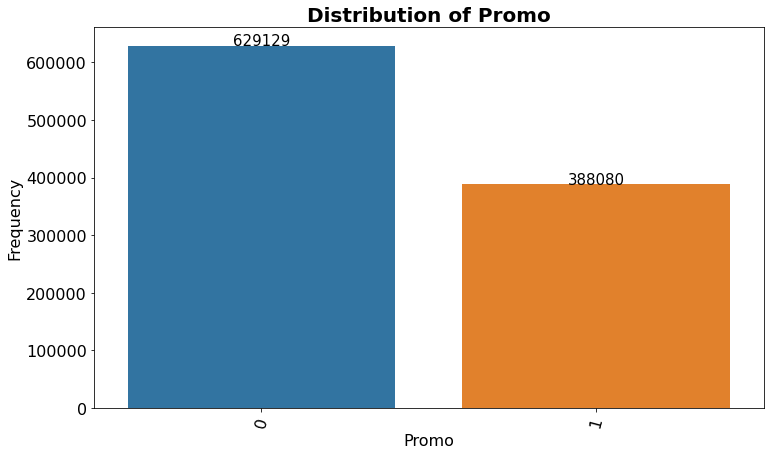

In [17]:
# checking distribution of 'Promo' (promotions) in the train_df

VisualiseDf.plot_count(train_df, 'Promo')

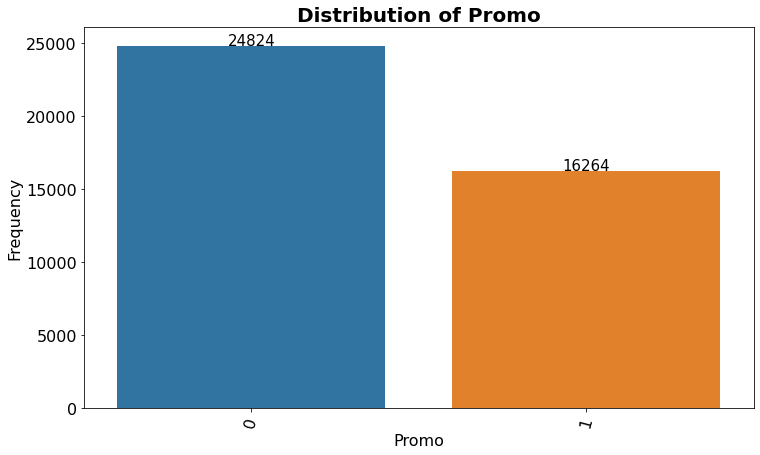

In [18]:
# checking distribution of 'Promo' (promotions) in the test_df

VisualiseDf.plot_count(test_df, 'Promo')

In the 

In [ ]:


# Load an example dataset with long-form data
# fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=train_df)

# ==============================================